# Tutorial

How to calculate multilayer resistive wall impedances for round and flat chambers.

Implementation was based on the methods presented in:

    [1] Mounet, N., & Métral, E. (2009). Electromagnetic field created by
        a macroparticle in an infinitel long and axisymmetric multilayer
        beam pipe. Geneva, Switzerland.
    [2] Mounet, N., & Métral, E. (2010). Electromagnetic fields and beam
        coupling impedances in a multilayer flat chamber. Geneva,
        Switzerland.
    [3] Mounet, N. (2012). The LHC Transverse Coupled-Bunch Instability.
        École Polytechinique Fédérale de Lausanne.


# Imports

In [1]:
from functools import partial

import numpy as np
import matplotlib.pyplot as mplt

import pycolleff.rings.sirius as sirius
import pycolleff.impedances as imp
import pycolleff.materials_params as mat_par

# Define Chamber Parameters

In [2]:
cu_cond = mat_par.cu_cond
cu_rel_time = mat_par.cu_rel_time
neg_cond = mat_par.neg_cond
neg_rel_time = mat_par.neg_rel_time
neg_thick = mat_par.neg_thick
ndfe_cond = mat_par.ndfe_cond
ndfe_mur = mat_par.ndfe_mur

energy = 3e9  # [eV]
length = 500  # [m]

epb = np.array([1, 1, 1, 1, 1])
mub = np.array([1, 1, 1, 1, ndfe_mur])
ange = np.array([0, 0, 0, 0, 0])
angm = np.array([0, 0, 0, 0, 0])
sigmadc = np.array([0, neg_cond, cu_cond, 0, ndfe_cond])
tau = np.array([0, neg_rel_time, cu_rel_time, 0, 0])

radius = 12e-3 + np.array([-neg_thick, 0, 1e-3, 3e-3])

In [3]:
ang_freq = imp.get_default_reswall_w(radius=radius[0], energy=energy)

In [4]:
epr, mur = imp.prepare_inputs_epr_mur(
    ang_freq, epb, mub, ange, angm, sigmadc, tau
)

# Round Chamber

In [5]:
Zll_r, Zdx_r, Zdy_r = imp.multilayer_round_chamber(
    ang_freq,
    length,
    energy,
    epr,
    mur,
    radius,
    precision=70,
    wmax_arb_prec=1e12,
    arb_prec_incl_long=False,
    print_progress=True,
)

0000/0302 -> freq =        0.1  (ET: 0.06 s)
0001/0302 -> freq =       0.11  (ET: 0.03 s)
0002/0302 -> freq =       0.12  (ET: 0.03 s)
0003/0302 -> freq =       0.13  (ET: 0.03 s)
0004/0302 -> freq =       0.15  (ET: 0.03 s)
0005/0302 -> freq =       0.16  (ET: 0.03 s)
0006/0302 -> freq =       0.17  (ET: 0.03 s)
0007/0302 -> freq =       0.19  (ET: 0.03 s)
0008/0302 -> freq =       0.21  (ET: 0.03 s)
0009/0302 -> freq =       0.23  (ET: 0.03 s)
0010/0302 -> freq =       0.25  (ET: 0.03 s)
0011/0302 -> freq =       0.28  (ET: 0.03 s)
0012/0302 -> freq =       0.31  (ET: 0.03 s)
0013/0302 -> freq =       0.34  (ET: 0.03 s)
0014/0302 -> freq =       0.37  (ET: 0.03 s)
0015/0302 -> freq =        0.4  (ET: 0.03 s)
0016/0302 -> freq =       0.44  (ET: 0.03 s)
0017/0302 -> freq =       0.49  (ET: 0.03 s)
0018/0302 -> freq =       0.53  (ET: 0.03 s)
0019/0302 -> freq =       0.59  (ET: 0.03 s)
0020/0302 -> freq =       0.64  (ET: 0.03 s)
0021/0302 -> freq =       0.71  (ET: 0.03 s)
0022/0302 

In [6]:
Zll_r, ang_freq_r = imp.get_impedance_for_negative_w(
    Zll_r, ang_freq, impedance_type='ll'
)
Zdx_r = imp.get_impedance_for_negative_w(Zdx_r, impedance_type='t')
Zdy_r = imp.get_impedance_for_negative_w(Zdy_r, impedance_type='t')

# Flat Chamber

In [7]:
Zll_f, Zdx_f, Zdy_f, Zqx_f, Zqy_f = imp.multilayer_flat_chamber(
    ang_freq,
    length,
    energy,
    epr,
    mur,
    radius,
    precision=70,
    print_progress=True,
)

0000/0401 -> freq =      0.1 Hz,   converged = yes,   n_evals = 0567  (ET: 1.80 s)
0001/0401 -> freq =     0.11 Hz,   converged = yes,   n_evals = 0525  (ET: 1.82 s)
0002/0401 -> freq =     0.12 Hz,   converged = yes,   n_evals = 0525  (ET: 1.80 s)
0003/0401 -> freq =     0.13 Hz,   converged = yes,   n_evals = 0525  (ET: 1.79 s)
0004/0401 -> freq =     0.15 Hz,   converged = yes,   n_evals = 0525  (ET: 1.77 s)
0005/0401 -> freq =     0.16 Hz,   converged = yes,   n_evals = 0525  (ET: 1.77 s)
0006/0401 -> freq =     0.17 Hz,   converged = yes,   n_evals = 0525  (ET: 1.77 s)
0007/0401 -> freq =     0.19 Hz,   converged = yes,   n_evals = 0525  (ET: 1.77 s)
0008/0401 -> freq =     0.21 Hz,   converged = yes,   n_evals = 0525  (ET: 1.78 s)
0009/0401 -> freq =     0.23 Hz,   converged = yes,   n_evals = 0525  (ET: 1.78 s)
0010/0401 -> freq =     0.25 Hz,   converged = yes,   n_evals = 0525  (ET: 1.91 s)
0011/0401 -> freq =     0.28 Hz,   converged = yes,   n_evals = 0525  (ET: 1.87 s)
0012

In [8]:
Zll_f, ang_freq_f = imp.get_impedance_for_negative_w(
    Zll_f, ang_freq, impedance_type='ll')
Zdx_f = imp.get_impedance_for_negative_w(Zdx_f, impedance_type='t')
Zdy_f = imp.get_impedance_for_negative_w(Zdy_f, impedance_type='t')
Zqx_f = imp.get_impedance_for_negative_w(Zqx_f, impedance_type='t')
Zqy_f = imp.get_impedance_for_negative_w(Zqy_f, impedance_type='t')

# Compare Both Impedances

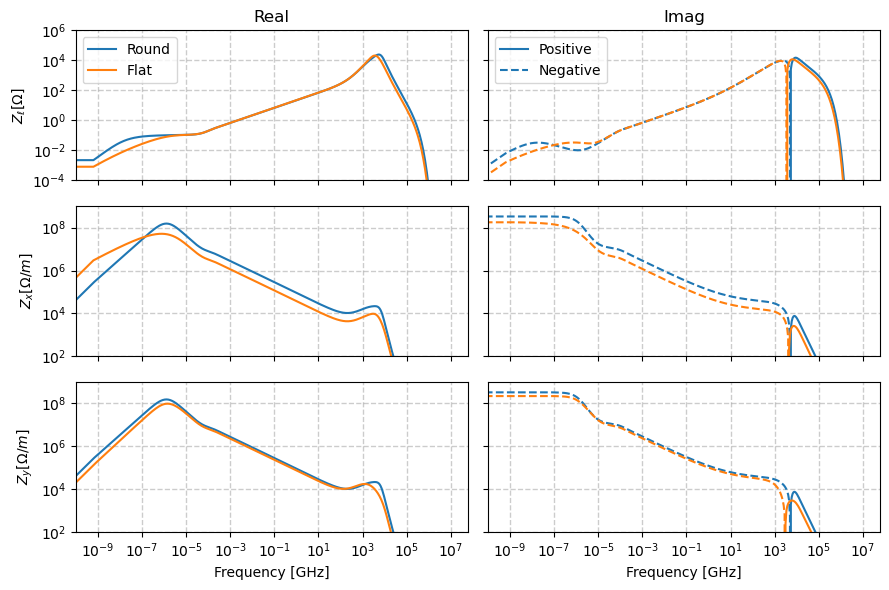

In [10]:
fig, axs = mplt.subplots(3, 2, figsize=(9, 6), sharex=True, sharey='row')

Z_r = (Zll_r, Zdx_r, Zdy_r)
Z_f = (Zll_f, Zdx_f, Zdy_f)
for i, (zr, zf) in enumerate(zip(Z_r, Z_f)):
    axs[i, 0].plot(ang_freq_r*1e-9, zr.real)
    axs[i, 1].plot(ang_freq_r*1e-9, zr.imag)
    axs[i, 1].plot(ang_freq_r*1e-9, -zr.imag, '--', color='C0')
    axs[i, 0].plot(ang_freq_f*1e-9, zf.real)
    axs[i, 1].plot(ang_freq_f*1e-9, zf.imag)
    axs[i, 1].plot(ang_freq_f*1e-9, -zf.imag, '--', color='C1')
    axs[i, 0].set_yscale('log')
    axs[i, 1].set_yscale('log')
    axs[i, 0].set_ylim((1e-4, 1e6) if not i else (1e2, 1e9))
    axs[i, 0].grid(True, alpha=0.4, ls='--', color='gray', lw=1)
    axs[i, 1].grid(True, alpha=0.4, ls='--', color='gray', lw=1)
axs[0, 0].set_xscale('log')
axs[-1, 0].set_xlabel('Frequency [GHz]')
axs[-1, 1].set_xlabel('Frequency [GHz]')
axs[0, 0].set_ylabel(r'$Z_\ell [\Omega]$')
axs[1, 0].set_ylabel(r'$Z_x [\Omega/m]$')
axs[2, 0].set_ylabel(r'$Z_y [\Omega/m]$')
axs[0, 0].set_title('Real')
axs[0, 1].set_title('Imag')
axs[0, 0].legend(['Round', 'Flat'], loc='best')
axs[0, 1].legend(['Positive', 'Negative'], loc='best')

fig.tight_layout()
mplt.show()

# Calculate Wakes from Impedances

In [11]:
spos = imp.DEFAULT_SPOS_RW.copy()

In [12]:
idx = ang_freq_r > 0
Wll_r = imp.from_impedance_to_wake(spos, ang_freq_r[idx], Zll_r[idx], plane='long')
Wdx_r = imp.from_impedance_to_wake(spos, ang_freq_r[idx], Zdx_r[idx], plane='trans')
Wdy_r = imp.from_impedance_to_wake(spos, ang_freq_r[idx], Zdy_r[idx], plane='trans')

In [13]:
idx = ang_freq_f > 0
Wll_f = imp.from_impedance_to_wake(spos, ang_freq_f[idx], Zll_f[idx], plane='long')
Wdx_f = imp.from_impedance_to_wake(spos, ang_freq_f[idx], Zdx_f[idx], plane='trans')
Wdy_f = imp.from_impedance_to_wake(spos, ang_freq_f[idx], Zdy_f[idx], plane='trans')
Wqx_f = imp.from_impedance_to_wake(spos, ang_freq_f[idx], Zqx_f[idx], plane='trans')
Wqy_f = imp.from_impedance_to_wake(spos, ang_freq_f[idx], Zqy_f[idx], plane='trans')

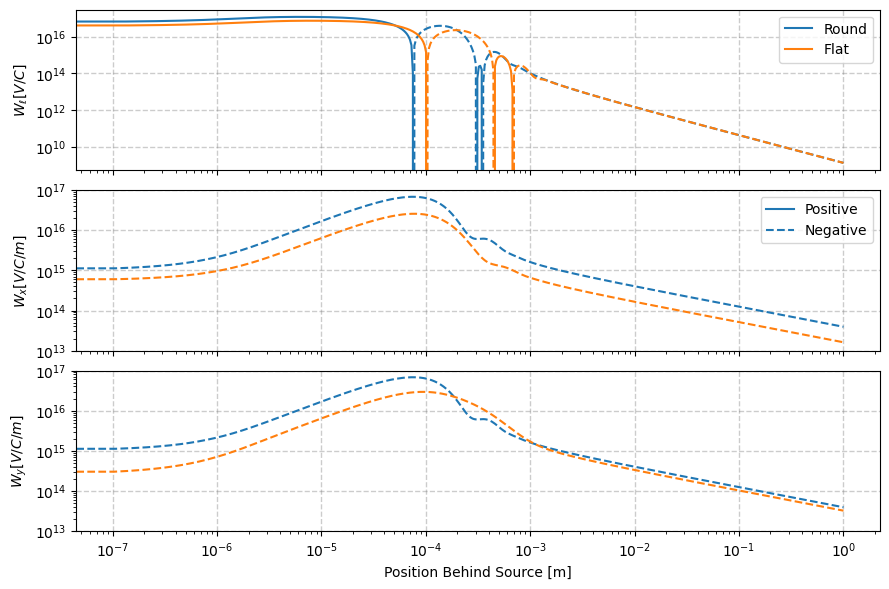

In [14]:
fig, axs = mplt.subplots(3, 1, figsize=(9, 6), sharex=True)

W_r = (Wll_r, Wdx_r, Wdy_r)
W_f = (Wll_f, Wdx_f, Wdy_f)
for i, (wr, wf) in enumerate(zip(W_r, W_f)):
    axs[i].plot(spos, wr.real, label='Round' if not i else 'Positive')
    axs[i].plot(spos, -wr.real, '--', color='C0', label='Negative' if i else '')
    axs[i].plot(spos, wf.real, label='Flat' if not i else '')
    axs[i].plot(spos, -wf.real, '--', color='C1')
    axs[i].set_yscale('log')
    axs[i].set_ylim((None, None) if not i else (1e13, 1e17))
    axs[i].grid(True, alpha=0.4, ls='--', color='gray', lw=1)
axs[0].set_xscale('log')
axs[-1].set_xlabel('Position Behind Source [m]')
axs[0].set_ylabel(r'$W_\ell [V/C]$')
axs[1].set_ylabel(r'$W_x [V/C/m]$')
axs[2].set_ylabel(r'$W_y [V/C/m]$')
axs[0].legend(loc='best')
axs[1].legend(loc='best')

fig.tight_layout()
mplt.show()